In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn .model_selection import train_test_split

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly
import warnings
warnings.filterwarnings("ignore")

In [2]:
ia=pd.read_csv("untitled3.txt")
ia

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [3]:
ia.shape

(1000, 39)

In [4]:
ia.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

In [5]:
ia.keys()

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [6]:
ia.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
ia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
ia.isin(['?']).sum().any()

True

In [9]:
ia=ia.replace('?',np.NaN)

In [10]:
ia['property_damage'].fillna(ia['property_damage'].mode()[0],inplace=True)
ia['police_report_available'].fillna(ia['police_report_available'].mode()[0],inplace=True)
ia['collision_type'].fillna(ia['collision_type'].mode()[0],inplace=True)

In [11]:
ia.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<Axes: >

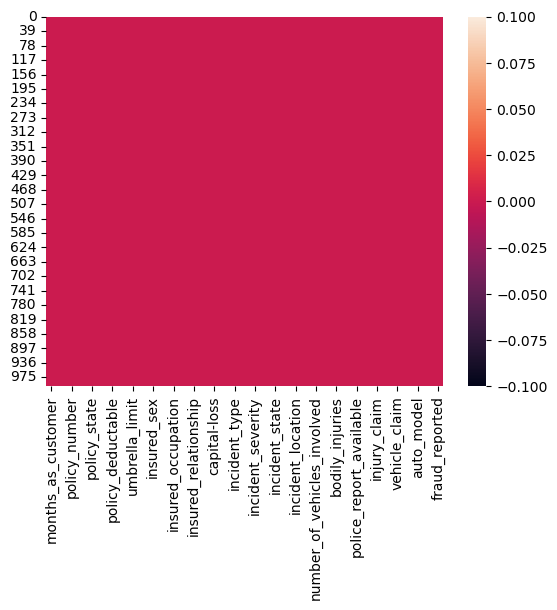

In [12]:
sns.heatmap(ia.isnull())

In [13]:
ia.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                      NO               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [15]:
ia['CSL_Personal']=ia.policy_csl.str.split('/',expand=True)[0]
ia['CSL_Accidental']=ia.policy_csl.str.split('/',expand=True)[1]

In [16]:
ia.drop("policy_csl",axis=1,inplace=True)

In [17]:
ia['policy_bind_date']=pd.to_datetime(ia['policy_bind_date'])
ia['incident_date']=pd.to_datetime(ia['incident_date'])

In [18]:
ia['policy_bind_day'] = ia['policy_bind_date'].dt.day
ia['policy_bind_month'] = ia['policy_bind_date'].dt.month
ia['policy_bind_year'] = ia['policy_bind_date'].dt.year

In [19]:
ia['incident_day'] = ia['incident_date'].dt.day
ia['incident_month'] = ia['incident_date'].dt.month
ia['incident_year'] = ia['incident_date'].dt.year

In [20]:
ia.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [21]:
ia.drop(['incident_year'],axis=1,inplace=True)

In [22]:
ia['Automobile_Age']=2015 - ia['auto_year']
ia.drop("auto_year",axis=1,inplace=True)

In [23]:
Categorical = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [24]:
ia.columns.to_series().groupby(ia.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

In [25]:
ia.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries          

In [26]:
ia.head()

months_as_customer  age  policy_number policy_state  policy_deductable  \
0                 328   48         521585           OH               1000   
1                 228   42         342868           IN               2000   
2                 134   29         687698           OH               2000   
3                 256   41         227811           IL               2000   
4                 228   44         367455           IL               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level  ... auto_model fraud_reported CSL_Personal  \
0                      MD  ...        92x              Y          250   
1                      MD  ...       E400              Y          250   
2                     PhD  ...        RAM              N          100   
3                     PhD  ...      Tahoe              Y          250   
4               Associate  ...        RSX              N          500   

   CSL_Accidental  policy_bind_day policy_bind_month policy_bind_year  \
0             500               17                10             2014   
1             500               27                 6             2006   
2             300                9                 6             2000   
3             500               25                 5             1990   
4            1000                6                 6             2014   

  incident_day incident_month Automobile_Age  
0           25              1             11  
1           21              1              8  
2           22              2              8  
3            1             10              1  
4           17              2              6  

[5 rows x 43 columns]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

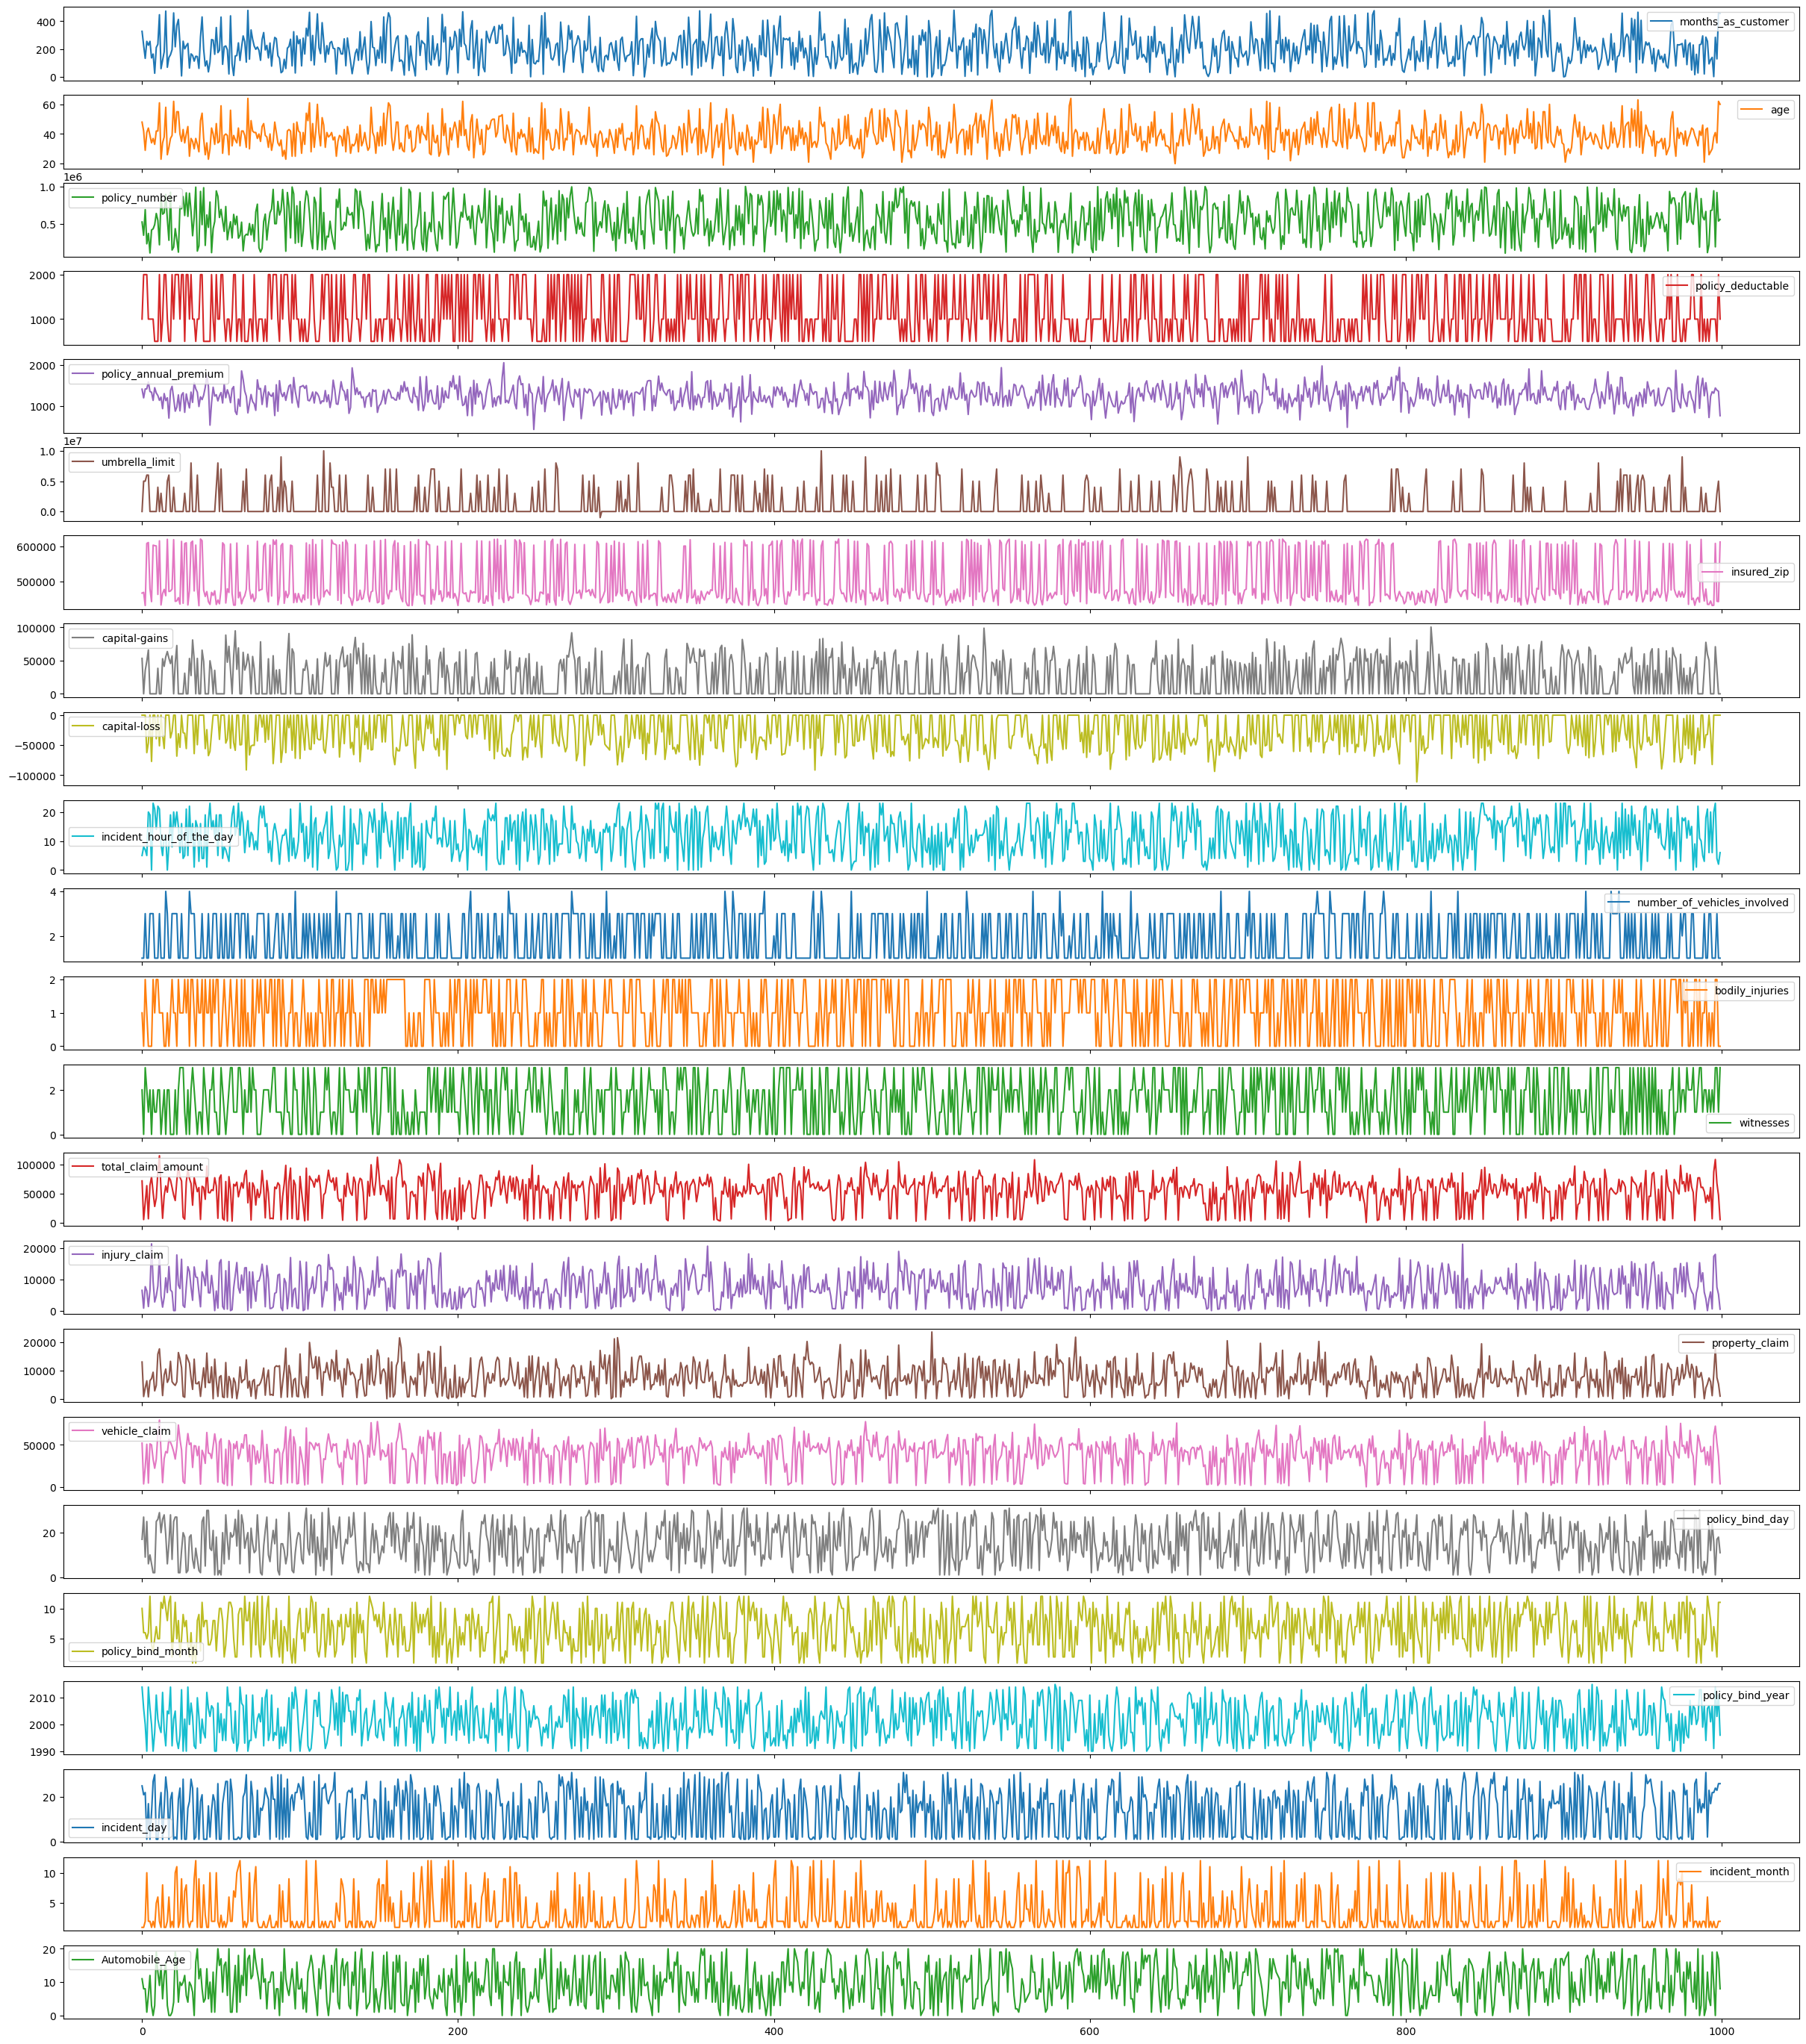

In [27]:
ia.plot(subplots=True, figsize=(30,35))

array([[<Axes: title={'center': 'months_as_customer'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'policy_number'}>,
        <Axes: title={'center': 'policy_deductable'}>,
        <Axes: title={'center': 'policy_annual_premium'}>],
       [<Axes: title={'center': 'umbrella_limit'}>,
        <Axes: title={'center': 'insured_zip'}>,
        <Axes: title={'center': 'capital-gains'}>,
        <Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'incident_hour_of_the_day'}>],
       [<Axes: title={'center': 'number_of_vehicles_involved'}>,
        <Axes: title={'center': 'bodily_injuries'}>,
        <Axes: title={'center': 'witnesses'}>,
        <Axes: title={'center': 'total_claim_amount'}>,
        <Axes: title={'center': 'injury_claim'}>],
       [<Axes: title={'center': 'property_claim'}>,
        <Axes: title={'center': 'vehicle_claim'}>,
        <Axes: title={'center': 'policy_bind_day'}>,
        <Axes: title={'center': 'policy_bind

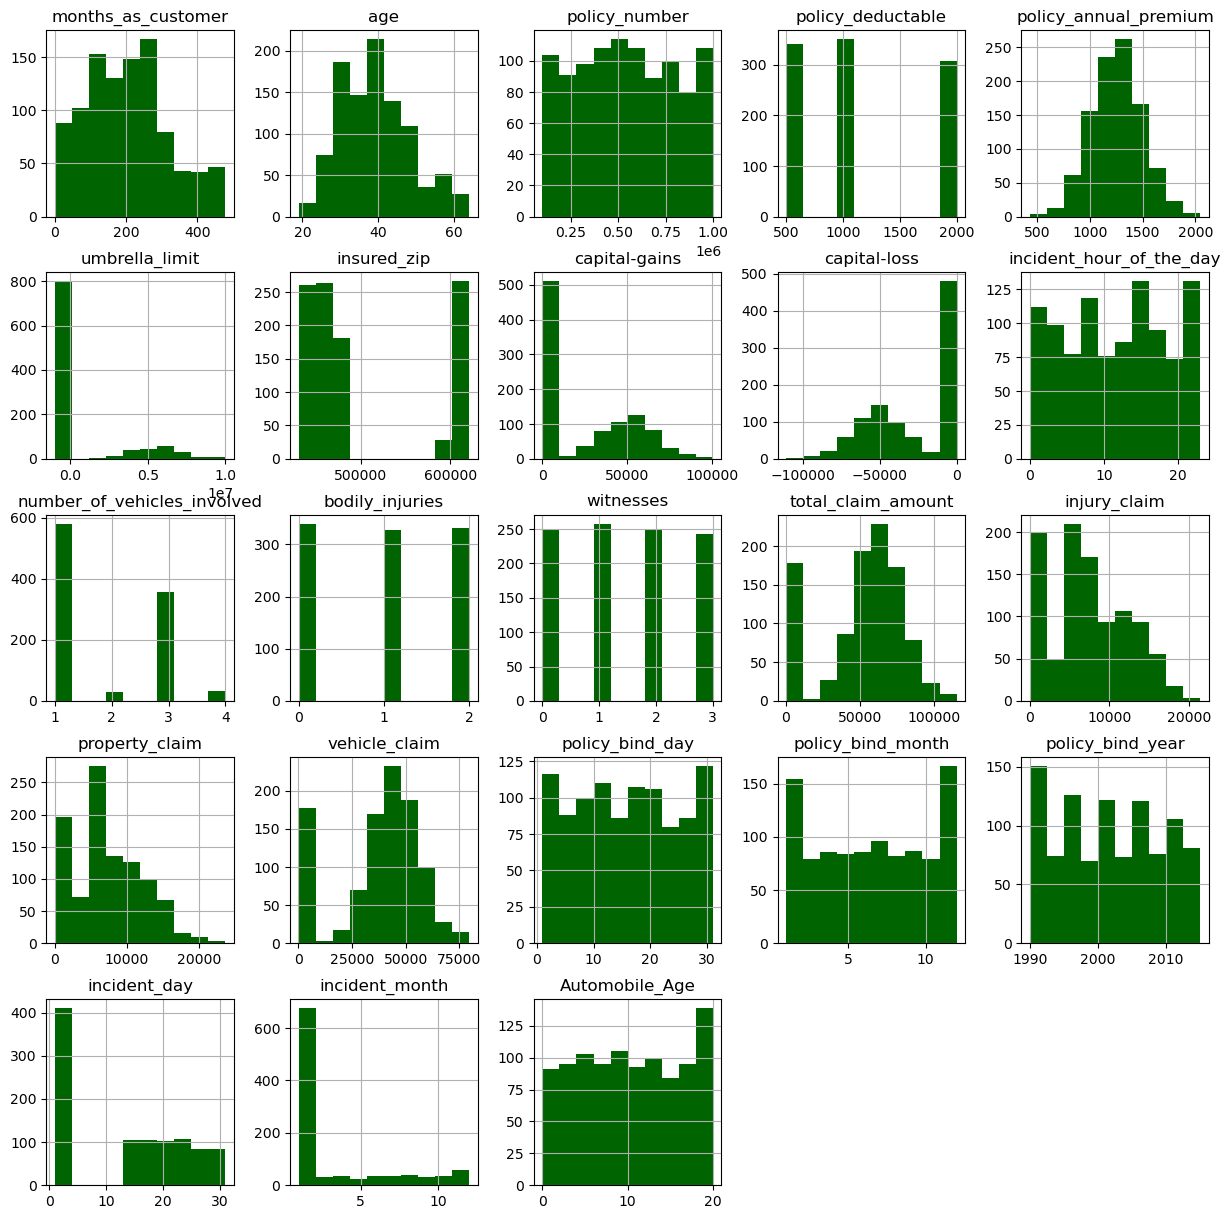

In [28]:
ia.hist(bins=10,figsize=(15,15),color='darkgreen')

<Axes: ylabel='insured_sex'>

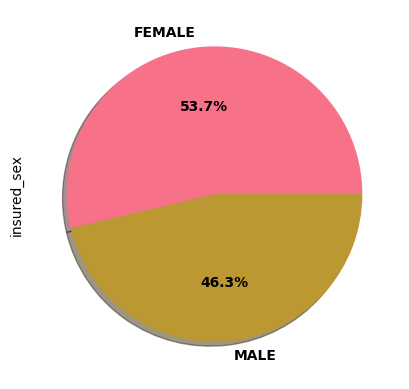

In [29]:
sns.set_palette('husl')
ia['insured_sex'].value_counts().plot.pie(autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':10},shadow=True)


<Axes: ylabel='insured_education_level'>

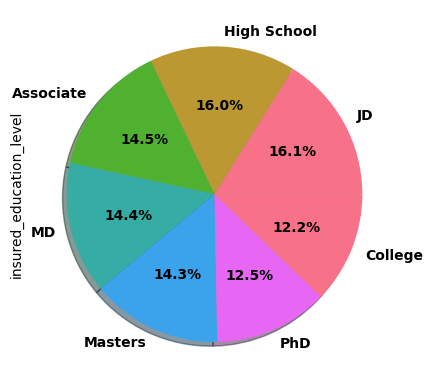

In [30]:
sns.set_palette('husl')
ia['insured_education_level'].value_counts().plot.pie(autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':10},shadow=True)


<Axes: ylabel='umbrella_limit'>

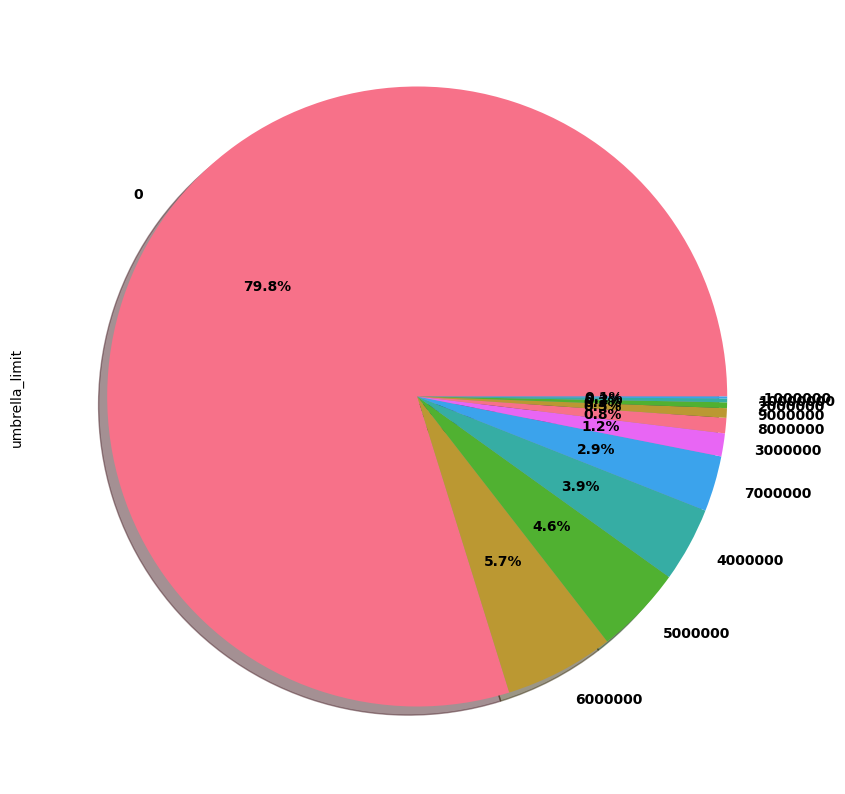

In [32]:
sns.set_palette('husl')
f,ax=plt.subplots(figsize=(10,20))
ia['umbrella_limit'].value_counts().plot.pie(autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':10},shadow=True)


<Axes: ylabel='fraud_reported'>

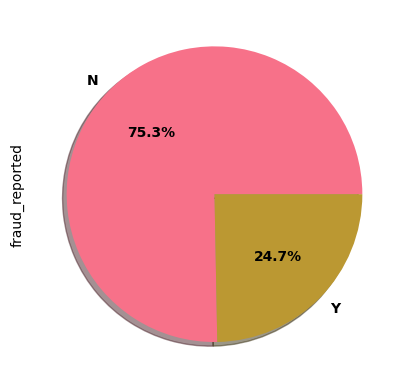

In [33]:
sns.set_palette('husl')
ia['fraud_reported'].value_counts().plot.pie(autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':10},shadow=True)


<Axes: ylabel='policy_state'>

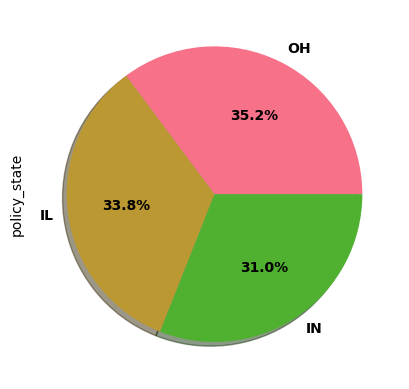

In [34]:
sns.set_palette('husl')
ia['policy_state'].value_counts().plot.pie(autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':10},shadow=True)


In [35]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    ia[i] = le.fit_transform(ia[i])
ia.head()

months_as_customer  age  policy_number  policy_state  policy_deductable  \
0                 328   48         521585             2               1000   
1                 228   42         342868             1               2000   
2                 134   29         687698             2               2000   
3                 256   41         227811             0               2000   
4                 228   44         367455             0               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132            1   
1                1197.22         5000000       468176            1   
2                1413.14         5000000       430632            0   
3                1415.74         6000000       608117            0   
4                1583.91         6000000       610706            1   

   insured_education_level  ...  auto_model  fraud_reported  CSL_Personal  \
0                        4  ...           1               1             1   
1                        4  ...          12               1             1   
2                        6  ...          30               0             0   
3                        6  ...          34               1             1   
4                        0  ...          31               0             2   

   CSL_Accidental  policy_bind_day  policy_bind_month  policy_bind_year  \
0               2               17                 10              2014   
1               2               27                  6              2006   
2               1                9                  6              2000   
3               2               25                  5              1990   
4               0                6                  6              2014   

   incident_day  incident_month  Automobile_Age  
0            25               1              11  
1            21               1               8  
2            22               2               8  
3             1              10               1  
4            17               2               6  

[5 rows x 43 columns]

In [37]:
ia.drop("incident_location",axis=1,inplace=True)

In [38]:
ia.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                     int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                

In [39]:
ia.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_state                          -0.000328 -0.014533       0.072815   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
insured_sex                            0.060925  0.073337       0.004564   
insured_education_level               -0.000833  0.000969      -0.037264   
insured_occupation                     0.009814  0.017220      -0.014422   
insured_hobbies                       -0.093661 -0.081315       0.039896   
insured_relationship                   0.069727  0.074832       0.017120   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_type                         -0.017377 -0.025626       0.001742   
collision_type                        -0.072787 -0.075642      -0.003338   
incident_severity                     -0.059581 -0.058439      -0.015719   
authorities_contacted                  0.010021  0.015417       0.018565   
incident_state                         0.005369  0.005770      -0.010064   
incident_city                         -0.000130 -0.002291      -0.035406   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
property_damage                        0.005488 -0.003408      -0.019923   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
police_report_available               -0.022146 -0.020441       0.031190   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_make                              0.047655  0.030410       0.023860   
auto_model                             0.004202  0.017343       0.065240   
fraud_reported                         0.020544  0.012143      -0.029443   
CSL_Personal                          -0.026819 -0.015185       0.038917   
CSL_Accidental                         0.008876  0.009876       0.045590   
policy_bind_day                        0.051728  0.053869       0.041885   
policy_bind_month                      0.005750  0.015501       0.005509   
policy_bind_year                      -0.048276 -0.037444      -0.040099   
incident_day                          -0.011092 -0.006131       0.057199   
incident_month                         0.024659  0.023404      -0.042512   
Automobile_Age                         0.000292 -0.001354       0.000183   

                             policy_state  policy_deductable  \
months_as_customer              -0.000328           0.026807   
age                             -0.014533           0.029188   
policy_number                    0.072815          -0.006738   
policy_state                     1.000000           0.010033   
policy_deductable                0.010033           1.000000   
policy_annual_premium            0.012455          -0.003245   
umbrella_limit                  -0.029580           0.010870   
insured_zip                      0.008777           0.004545   
insured_sex                     -0.020481          -0.009733   
insured_education_level         -0.034327           0.015217   
insured_occupation              -0.031215          -0.04

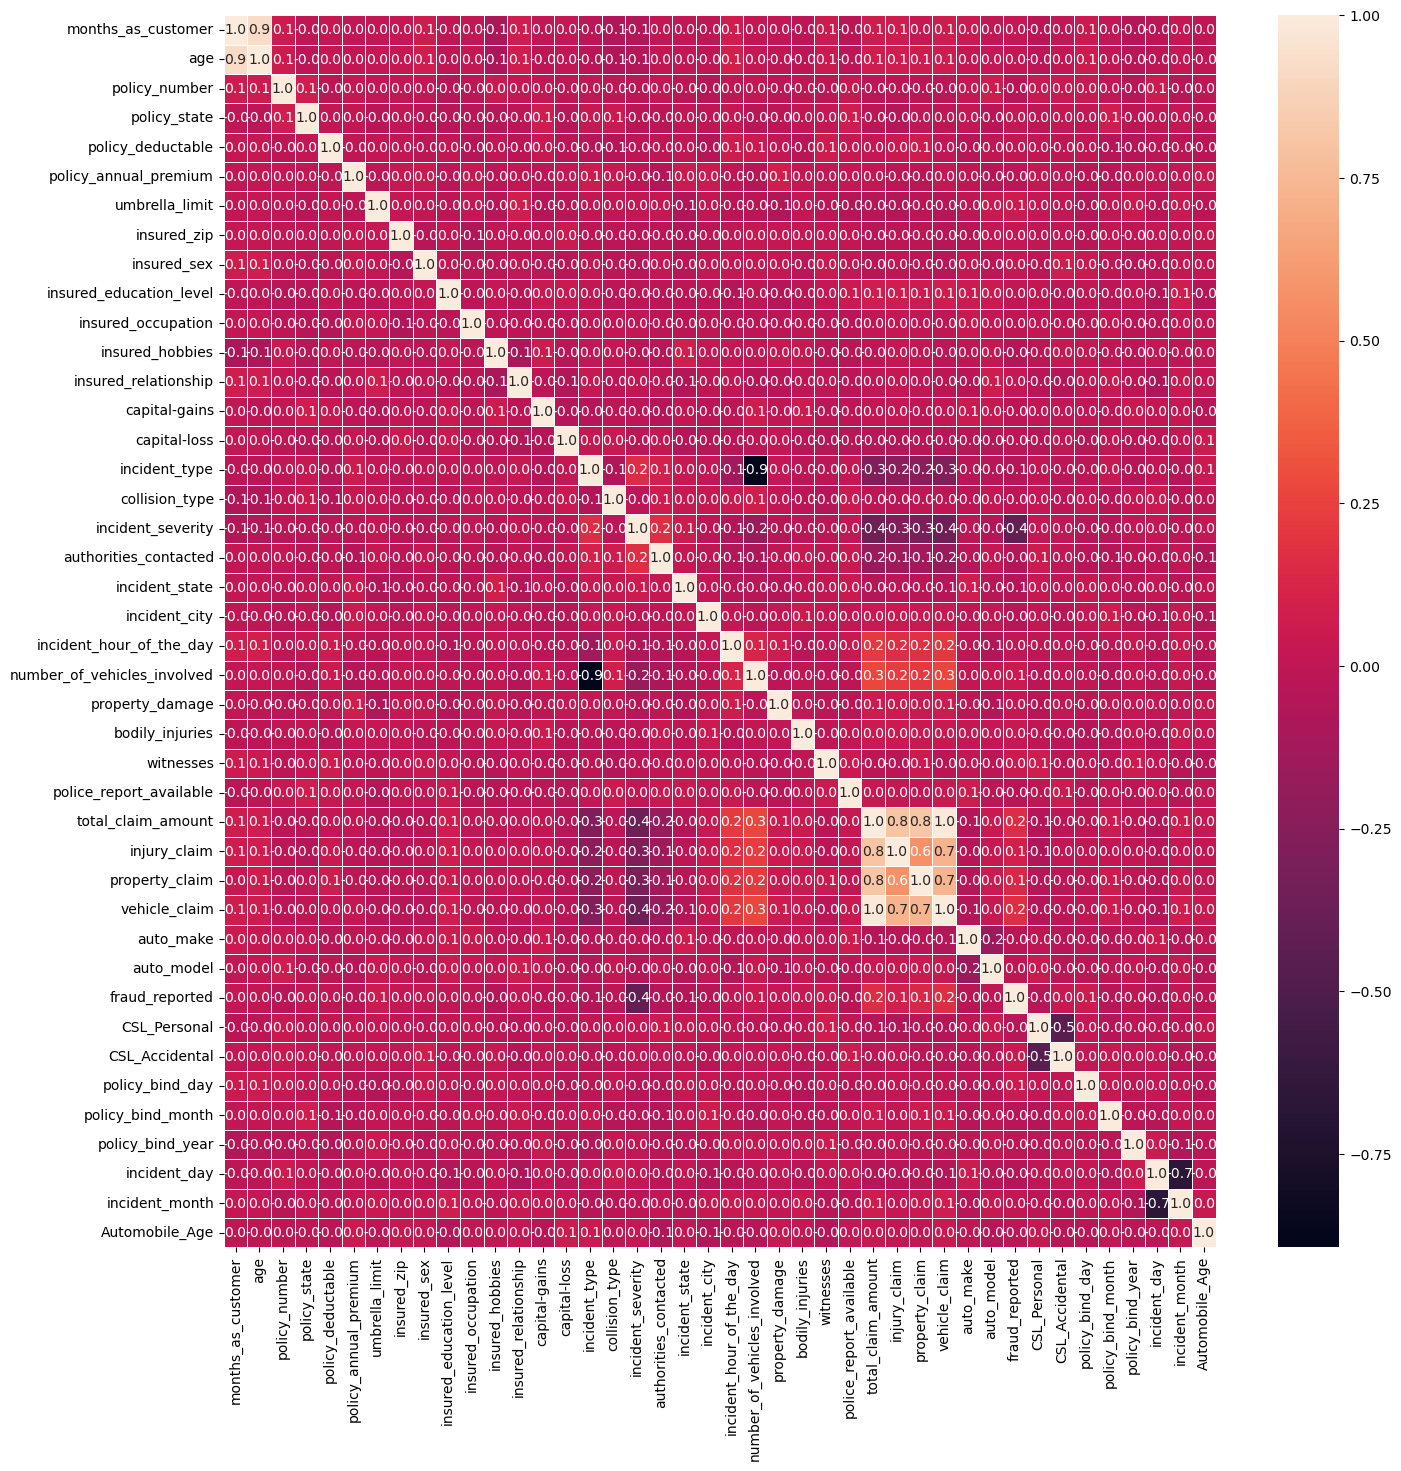

In [40]:
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(ia.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.show()

Customer Characteristics: There are moderate positive correlations between variables like "months_as_customer," "age," "insured_education_level," and "insured_occupation." This suggests that customers with longer tenure, higher age, education level, and certain occupations may share common characteristics or behaviors.
Policy Details: Variables like "policy_number," "policy_deductible," and "policy_annual_premium" exhibit weak to moderate correlations with other variables. This could indicate that policy details may not be strongly influenced by customer characteristics or incident factors.
Incident Severity: The "incident_severity" variable shows notable positive correlations with factors like "collision_type," "injuries_bodily," "witnesses," and "total_claim_amount." This implies that more severe incidents are likely to involve collisions, injuries, witnesses, and higher claim amounts.
Claims and Damages: Variables such as "property_damage," "injury_claim," "property_claim," and "vehicle_claim" have moderate to strong positive correlations with each other and with "total_claim_amount." This suggests that different types of claims and damages are interconnected and contribute to the overall claim amount.
Vehicle Factors: The "Automobile_Age" variable exhibits weak correlations with most other variables, indicating that the age of the vehicle may not significantly influence other factors in the dataset.
Fraud and CSL: The "fraud_reported" and "CSL_Personal" variables show weak correlations with most other variables, suggesting that fraud and personal CSL incidents may not be strongly related to the other factors in the dataset.
Temporal Patterns: Variables representing temporal aspects, such as "incident_day," "incident_month," and "policy_bind" variables, exhibit weak correlations with most other variables. This could mean that temporal factors may not significantly influence other variables or that their relationships are more complex.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings ('ignore')

In [42]:
ia.fraud_reported.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [43]:
x = ia.drop(['fraud_reported'], axis =1)
y = ia['fraud_reported']

In [44]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [45]:
x.shape

(1506, 41)

In [46]:
y.shape

(1506,)

In [47]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
xtrain.shape

(1204, 41)

In [50]:
xtest.shape

(302, 41)

In [51]:
ytrain.shape

(1204,)

In [52]:
ytest.shape

(302,)

In [53]:
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

In [54]:
predsv=sv.predict(xtest)
predsv

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,

In [55]:
print(accuracy_score(ytest,predsv))

0.5033112582781457


In [56]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [57]:
pred=lg.predict(xtest)
pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [58]:
accuracy_score(pred,ytest)

0.5662251655629139

In [59]:
# Hyperparameter Tuning

In [60]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [61]:
import numpy as np
alpha_min = 0.1
alpha_max = 1
num_values = 10
alphas = np.logspace(np.log10(alpha_min), np.log10(alpha_max), num=num_values)

print("Alpha values:", alphas)

Alpha values: [0.1        0.12915497 0.16681005 0.21544347 0.27825594 0.35938137
 0.46415888 0.59948425 0.77426368 1.        ]


In [62]:
alphavalue = {'alpha': [0.1, 0.12915497, 0.16681005, 0.21544347, 0.27825594, 0.35938137,
 0.46415888, 0.59948425, 0.77426368, 1.]}

model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=alphavalue, cv=5)
grid.fit(x, y)

print("Best score:", grid.best_score_)
print("Best estimator alpha:", grid.best_estimator_.alpha)
print("Best params:", grid.best_params_)

Best score: 0.1351431415617841
Best estimator alpha: 0.1
Best params: {'alpha': 0.1}


In [63]:
import os

model_file = 'best_model.pkl'
if os.path.exists(model_file):
    print("Best model is saved as", model_file)
else:
    print("Failed to save the model.")

Best model is saved as best_model.pkl


Model Selection and Training
A variety of machine learning models were explored, such as logistic regression, k-neighbors classifier, decision tree regressor and decsion tree classifier. These models were selected for their capacity to handle regression and classification tasks and their flexibility in capturing complex relationships within the data. Prior to training, the dataset was partitioned into training and testing subsets using the train_test_split function from the scikit-learn library, ensuring robust model evaluation and performance assessment.

Hyperparameter Tuning
Hyperparameter tuning was performed for some models to optimize their performance. This process involved selecting the best values for the hyperparameters using techniques such as grid search or randomized search. Evaluation metrics were used to compare different models and select the best-performing one.

Evaluation Metrics
The performance of the trained models was evaluated using appropriate evaluation metrics. These metrics provide insights into how well the models are able to predict the next day maximum and minimum temperature based on the given features.